# New Audio Models

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tools.create import create_single_models, create_set_models
from tools.base import (dump_collection, load_collection, 
                        flatten_collection, compute_metrics,
                        _extract_regressors)
from tools.viz import (plot_regressor,
                       plot_metrics, plot_contrast_by_dataset, plot_contrast_by_analysis,
                       plot_analysis_grid)
from pyns import Neuroscout
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
%matplotlib inline

In [3]:
api = Neuroscout()

## Define predictors and confounds

In [7]:
rmslist = ['rms']
tonal = ['tonal_centroid_0', 'tonal_centroid_1', 'tonal_centroid_2', 'tonal_centroid_3', 'tonal_centroid_4', 'tonal_centroid_5']

In [11]:
confounds = ['a_comp_cor_00', 'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03', 'a_comp_cor_04', 'a_comp_cor_05', 'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']

## Create models

In [12]:
single_models = create_single_models(rmslist, confounds)
tonal_models = create_set_models(tonal, confounds, name='tonnetz')

In [4]:
fname = Path('models') / 'new_rms.json'
fname_tonal = Path('models') / 'tonal.json'

In [14]:
dump_collection(single_models, fname)
dump_collection(tonal_models, fname_tonal)

In [5]:
single_models = load_collection(fname)
tonal_models = load_collection(fname_tonal)

In [8]:
tonal_models = {'+'.join(tonal): tonal_models}

## Generate reports

In [16]:
for (pred, dataset, task), model in flatten_collection(single_models)[:2]:
    model.generate_report(run_id=model.runs[0])

In [19]:
for (pred, dataset, task), model in flatten_collection(tonal_models)[:2]:
    model.generate_report(run_id=model.runs[0])

In [22]:
for p in rmslist:
    single_models[p]['Budapest']['movie'].plot_report()

In [24]:
tonal_models['+'.join(tonal)]['Budapest']['movie'].plot_report()

'OK'

## Inspect regressors

In [ ]:
df = _extract_regressors(single_models)

In [ ]:
plot_regressor_distribution(df=df, split_by='hue', color=None, aspect=3, hist=None, rug=True)

In [ ]:
plot_regressor_timeseries(df=df, split_by='row', height=1.2, aspect=10)

In [ ]:
agg_df = compute_metrics(df=df, aggfunc=[np.mean, np.std, np.var])

In [ ]:
plot_metrics(agg_df, metrics=['mean', 'std', 'var'],
             sns_function='barplot', height=3, aspect=1)

## Compile models

In [50]:
for (pred, dataset, task), model in flatten_collection(single_models):
    if model.get_status()['status'] == 'DRAFT':
        model.private = False
        model.push()
        model.compile()
    else:
        print(f'{pred} {model.status} for {dataset}')

rms PASSED for Budapest
rms PASSED for HealthyBrainNetwork
rms PASSED for LearningTemporalStructure
rms PASSED for Life
rms PASSED for ParanoiaStory
rms PASSED for Raiders
rms PASSED for SchematicNarrative
rms PASSED for Sherlock
rms PASSED for SherlockMerlin
rms PASSED for SherlockMerlin
rms PASSED for studyforrest


In [72]:
for (pred, dataset, task), model in flatten_collection(tonal_models):
    if model.get_status()['status'] == 'DRAFT':
        model.private = False
        model.push()
        model.compile()
    else:
        print(f'tonal models {model.status} for {dataset}')

tonal models PASSED for Budapest
tonal models PASSED for HealthyBrainNetwork
tonal models PASSED for LearningTemporalStructure
tonal models PASSED for Life
tonal models PASSED for ParanoiaStory
tonal models PASSED for Raiders
tonal models PASSED for SchematicNarrative
tonal models PASSED for Sherlock
tonal models PASSED for SherlockMerlin
tonal models PASSED for SherlockMerlin
tonal models PASSED for studyforrest


In [29]:
' '.join([a[1].hash_id for a in flatten_collection(single_models)])

'8ytxy fb9ak ro5d2 fdstd qy8r8 oku9e dth7h njw6g 9z593 6ijx5 dsugf'

In [39]:
' '.join([a[1].hash_id for a in flatten_collection(tonal_models)])

'g5wfg g3q54 8ms8a oa4hv sesis oiru3 ge7ot n654u eef5u egwhj h84ju'

## Results

In [11]:
flat_models = flatten_collection(single_models)
flat_models_tonal = flatten_collection(tonal_models)

No image for HealthyBrainNetwork


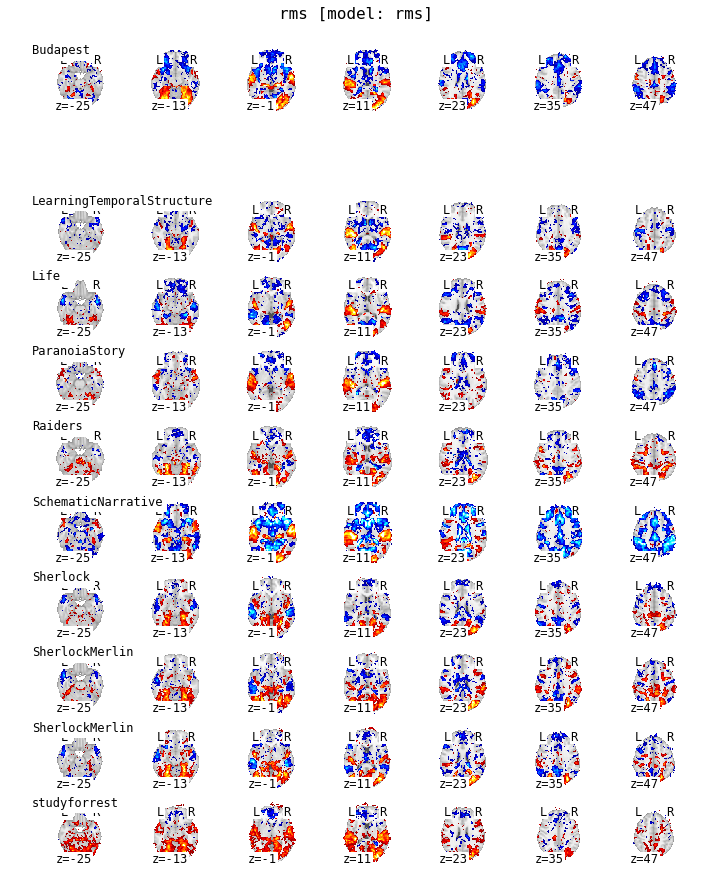

In [10]:
plt.rcParams.update({'font.family': 'monospace'})
plot_contrast_by_analysis(flat_models,
                          vmax=10, display_mode='z', figsize=(12,15),
                          threshold=1.96, colorbar=False)

No image for HealthyBrainNetwork


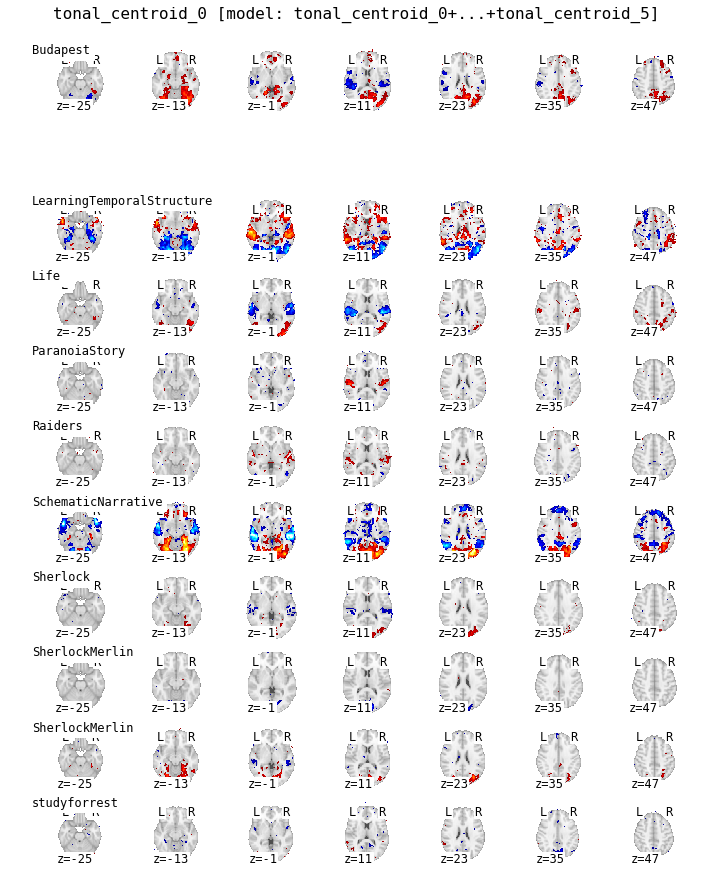

No image for HealthyBrainNetwork


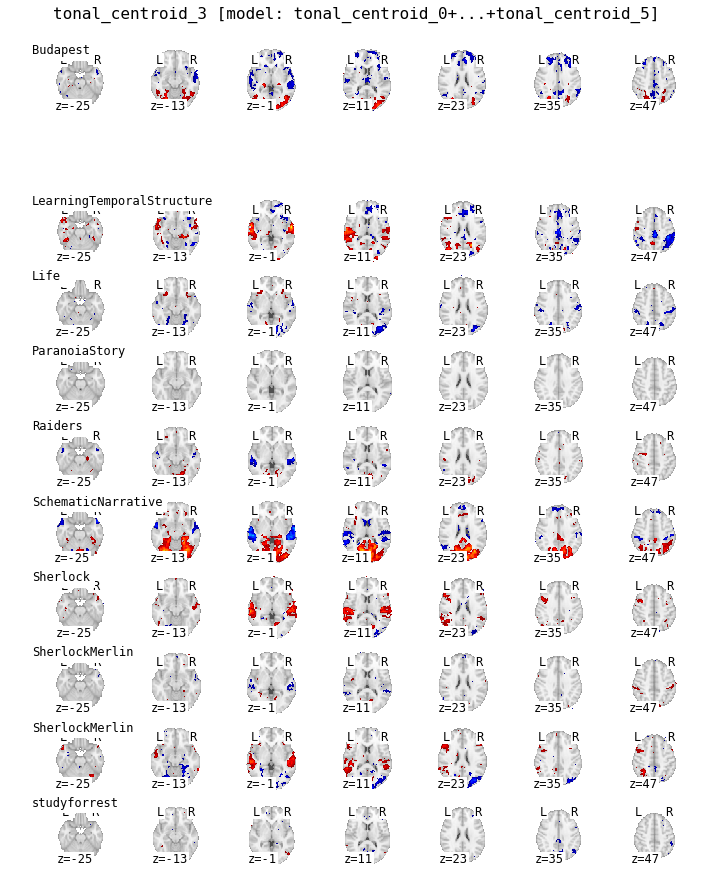

No image for HealthyBrainNetwork


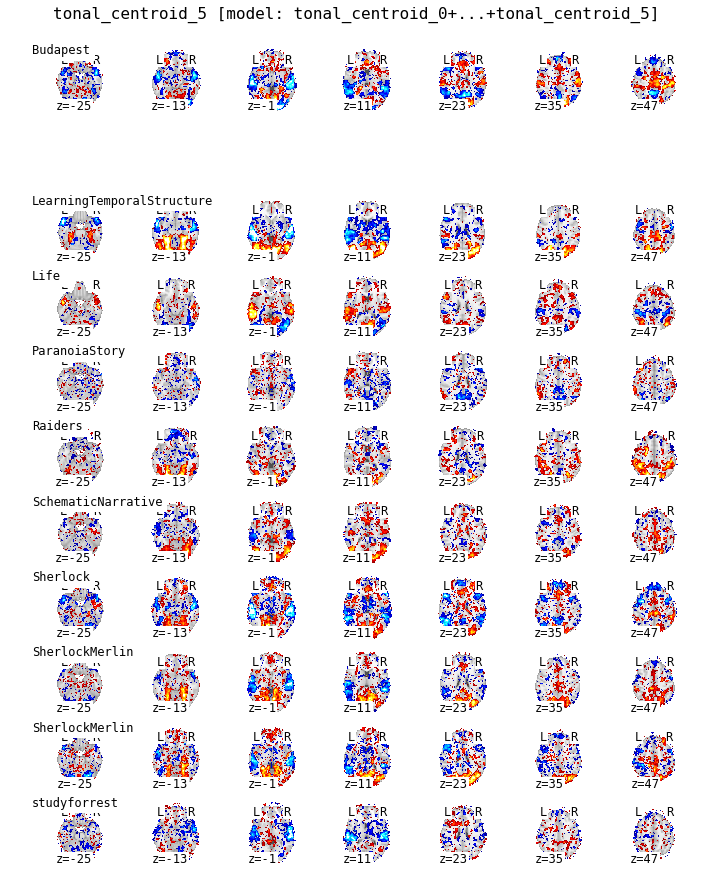

No image for HealthyBrainNetwork


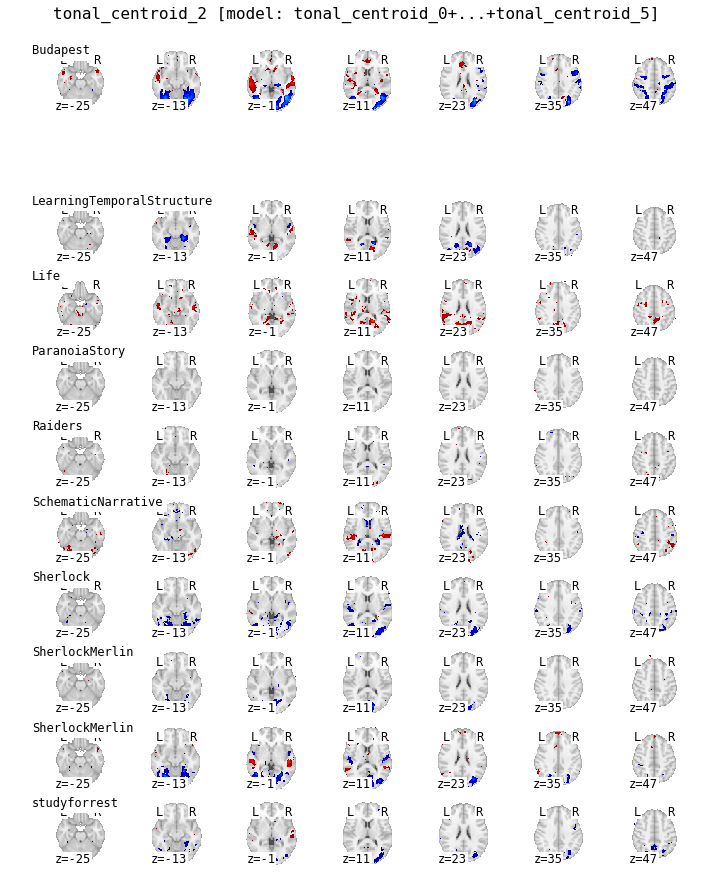

No image for HealthyBrainNetwork


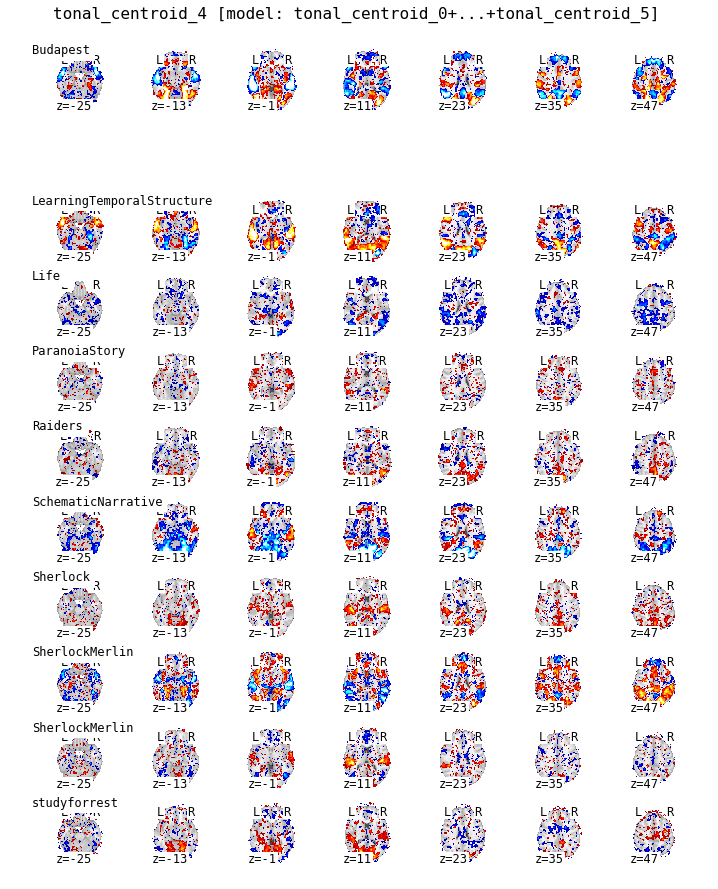

No image for HealthyBrainNetwork


In [12]:
plt.rcParams.update({'font.family': 'monospace'})
plot_contrast_by_analysis(flat_models_tonal,
                          vmax=10, display_mode='z', figsize=(12,15),
                          threshold=1.96, colorbar=False)